In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_excel('tip-amount.xlsx')

In [5]:
data.head()

,Meal,Observed total bill(xi),Observed tip amount(yi)
0,1,34,5
1,2,108,17
2,3,64,11
3,4,88,8
4,5,99,14


<AxesSubplot:>

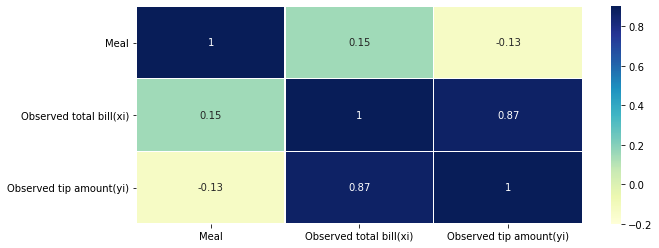

In [6]:
corrmatrix=data.corr()      #finding the correlation in the data
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-.2,vmax=.9,annot=True,linewidth=0.2,cmap='YlGnBu')
#vmin and vmax is the max and min corrltn values. Highlighting of the cells are wrt these value
#annot = True means printing the corrltn values inside each cell
#linewidth means the seperation of each cell

In [7]:
data.columns

Index(['Meal', 'Observed total bill(xi)', 'Observed tip amount(yi)'], dtype='object')

In [10]:
#spliting indipendent and dependent variables to x and y
#also remove variables with low correltn to our output(tip amt), so meal can be removed
y=data['Observed tip amount(yi)']
x=data.drop(['Meal','Observed tip amount(yi)'],axis=1)

In [13]:
#spliting the data into train and test using Sklearn lib
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
#test size shows the % to test and train data set, here 25% is in test and left 75% in train dataset

In [14]:
from sklearn import linear_model

In [15]:
lr=linear_model.LinearRegression()

In [16]:
model=lr.fit(x_train,y_train)

In [17]:
predictions = model.predict(x_test)

In [18]:
print(y_test)

0     5
1    17
Name: Observed tip amount(yi), dtype: int64


In [19]:
print(predictions)

[ 4.31609993 13.55968078]


In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
print('MSE is: ',mean_squared_error(y_test,predictions))

MSE is:  6.151757829712871


# Dataset -Winequality

In [3]:
data=pd.read_csv('winequality-red.csv')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


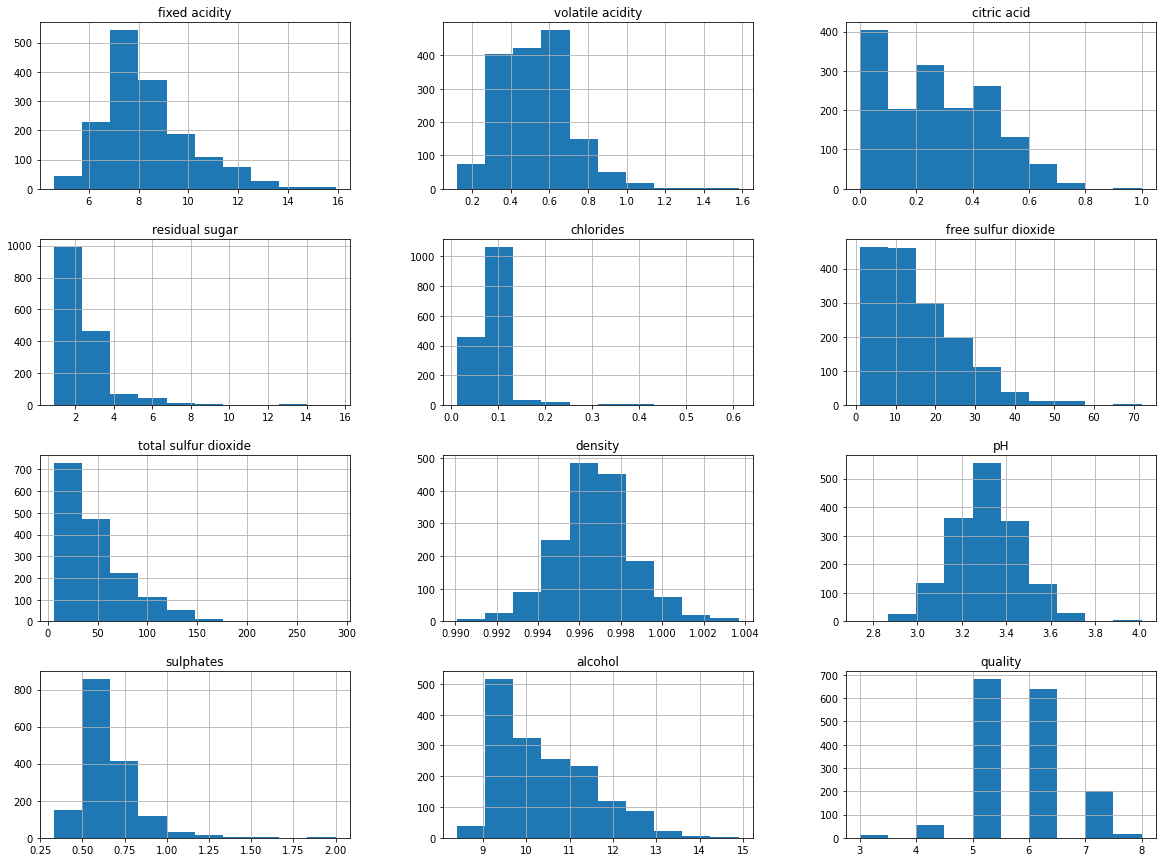

In [18]:
freqgraph=data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

<AxesSubplot:>

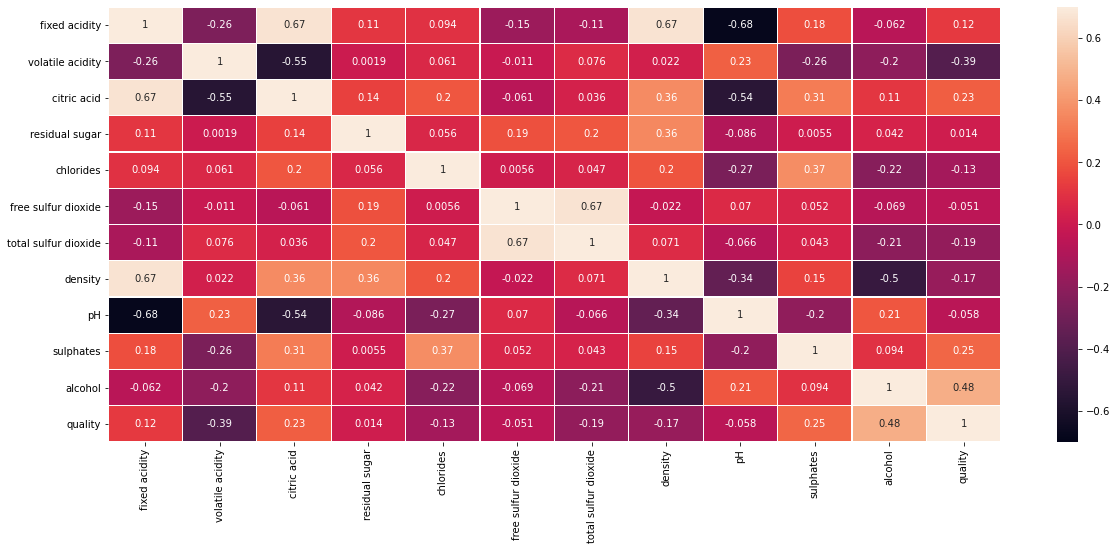

In [23]:
corrmatrix= data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.7,vmax=.7,annot=True,linewidth=.2)

In [24]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
data1=data.drop(['fixed acidity','free sulfur dioxide','density'],axis=1)

In [26]:
data1.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
y=data1['quality']
x=data1.drop(['quality'],axis=1)

In [30]:
x.shape

(1599, 8)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [35]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [36]:
model=lr.fit(x_train,y_train)

In [37]:
predictions=model.predict(x_test)

In [38]:
print(y_test)

803     6
124     5
350     6
682     5
1326    6
       ..
1565    6
327     5
254     6
322     5
1160    7
Name: quality, Length: 400, dtype: int64


In [39]:
print(predictions)

[5.36573498 5.07721369 5.60698274 5.39140074 5.72969707 5.21333352
 5.09687179 5.13821023 5.75687072 5.69698188 6.1597745  5.26198819
 5.54418606 5.20924318 5.41559645 6.49914113 5.20021116 5.59170724
 6.59225973 5.31259464 5.45007367 5.18916904 5.98702503 6.42238211
 5.36569034 5.43228543 6.39936141 5.39404074 5.16299376 6.17266341
 5.28343432 5.59746345 5.78576466 5.38225279 5.45861267 5.06846554
 6.18787978 5.72387681 5.62119428 6.2126     5.49319541 5.29621209
 6.19518032 5.2264394  5.85454011 5.82197098 6.42923069 5.57184348
 5.16874304 5.586664   5.15379748 5.10317495 5.61548557 6.45194053
 5.02201755 5.06598232 6.01545709 5.49104996 5.84592793 5.26518367
 5.63978429 5.98036776 5.27944843 5.34903789 6.43413819 5.37562983
 6.3607748  5.31080635 6.49376965 5.29196656 6.45490511 4.76722094
 5.80564046 5.84684295 6.1955758  5.30011142 6.80702574 5.86425989
 6.15637682 6.48774906 5.35459331 6.46061466 5.36391195 5.73485395
 5.68839601 6.32331397 5.30570103 5.85001562 6.32379254 5.2510

In [41]:
from sklearn.metrics import mean_squared_error

In [43]:
print('MSE is: ',mean_squared_error(y_test,predictions))

MSE is:  0.3891025192103126


# Pearson Correlation

Used for-
* To uncover (linear) relationships between variables
* Not to rule out possible(nonlinear) relationships btwn variables

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

In [6]:
%matplotlib inline
rcParams['figure.figsize']=8,4
plt.style.use('seaborn-whitegrid')

## Pearson correlation

In [7]:
data=pd.read_csv('auto-mpg.csv')

In [8]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [34]:
#cleaning horsepower
data=data.drop([32, 126, 330, 336, 354, 374])
data['horsepower']=data['horsepower'].astype(float)

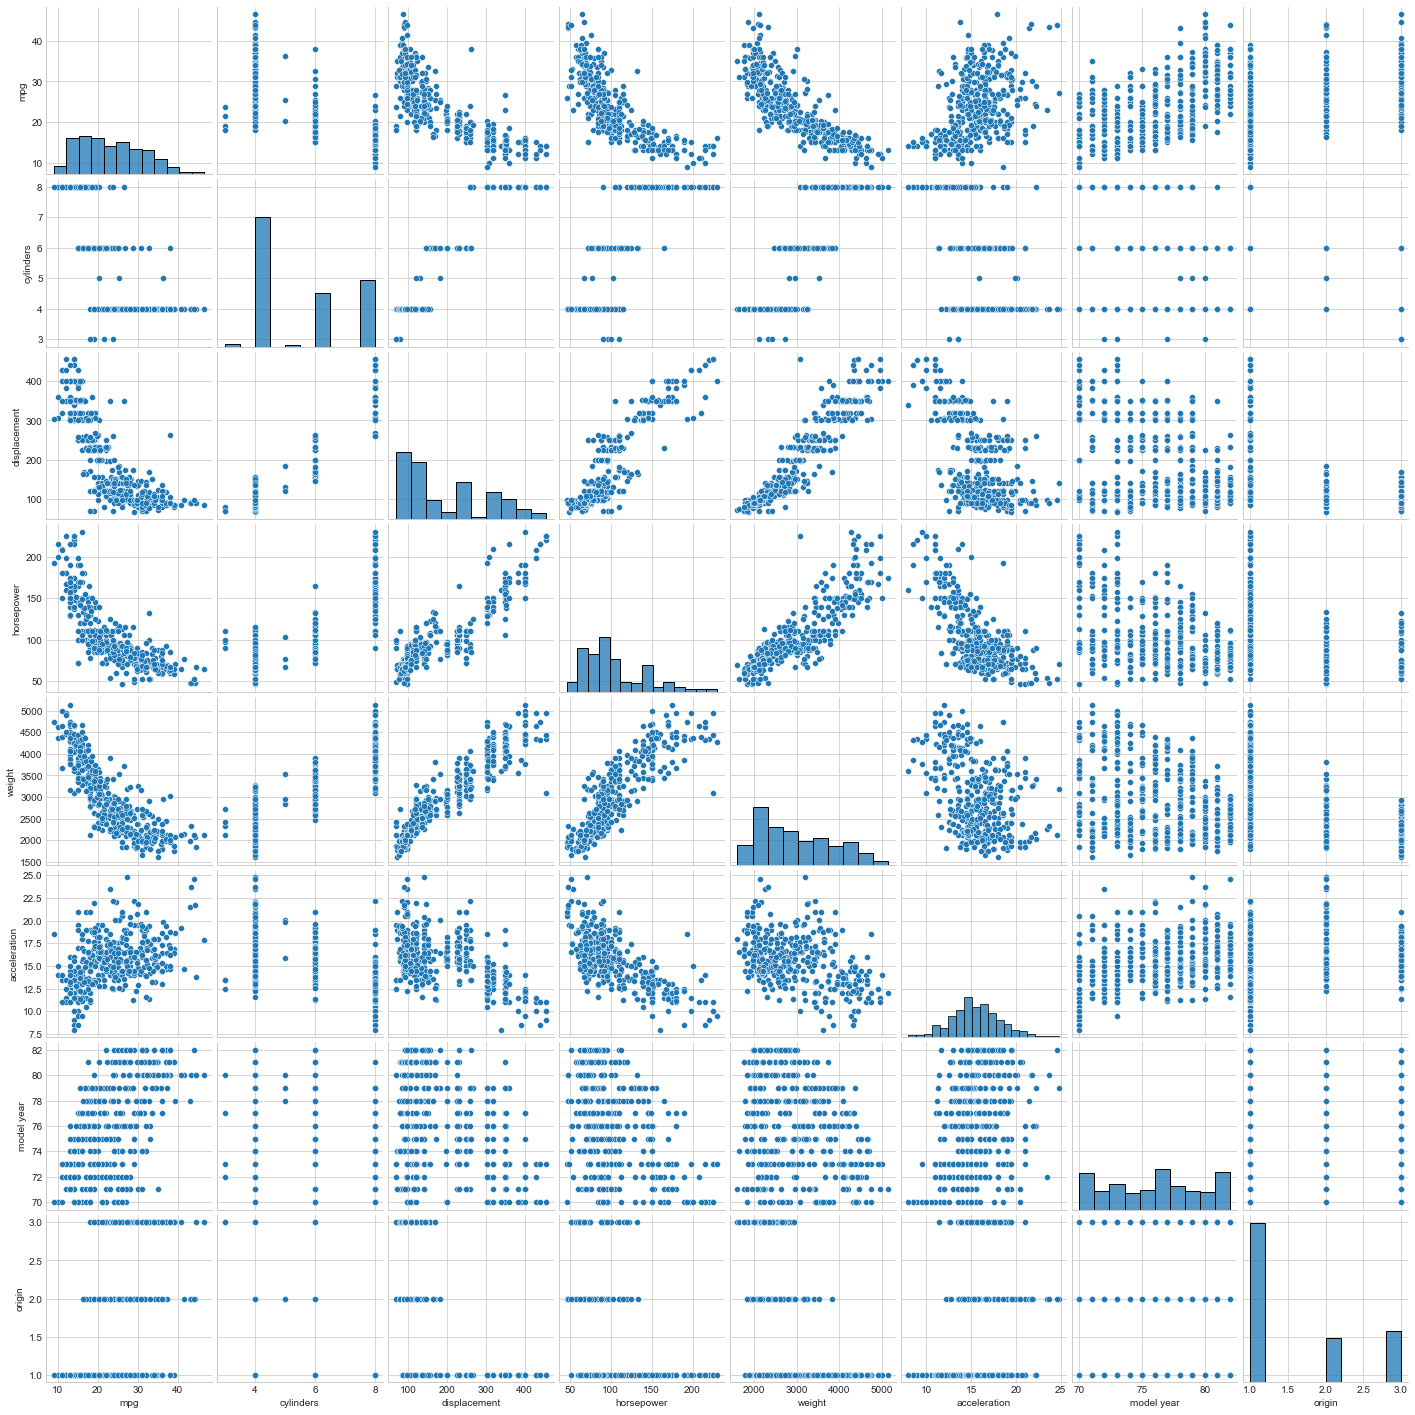

In [35]:
sns.pairplot(data)

In [36]:
x=data[['mpg','horsepower','acceleration','weight']]

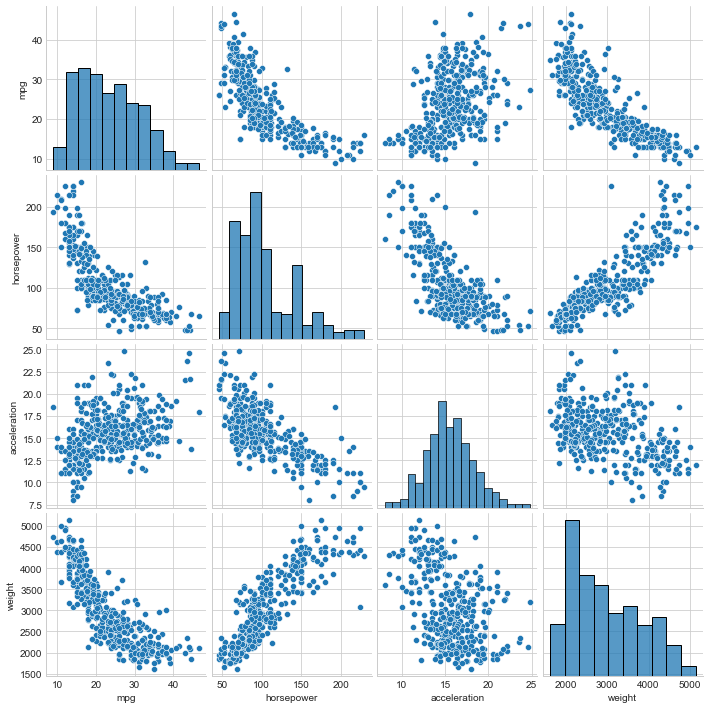

In [38]:
sns.pairplot(x)

## Using scipy to calculate the Pearson correlation coefficient

In [40]:
pearsonr_coefficient,p_value=pearsonr(x['mpg'],x['horsepower'])
print('PearsonR Correlation Coefficient %0.3f'%(pearsonr_coefficient))

PearsonR Correlation Coefficient -0.778


In [41]:
pearsonr_coefficient,p_value=pearsonr(x['mpg'],x['acceleration'])
print('PearsonR Correlation Coefficient %0.3f'%(pearsonr_coefficient))

PearsonR Correlation Coefficient 0.423


In [42]:
pearsonr_coefficient,p_value=pearsonr(x['mpg'],x['weight'])
print('PearsonR Correlation Coefficient %0.3f'%(pearsonr_coefficient))

PearsonR Correlation Coefficient -0.832


## Using pandas to calculate the Pearson correlation coefficient

In [44]:
corr=x.corr()
corr

,mpg,horsepower,acceleration,weight
mpg,1.000000,-0.778427,0.423329,-0.832244
horsepower,-0.778427,1.000000,-0.689196,0.864538
acceleration,0.423329,-0.689196,1.000000,-0.416839
weight,-0.832244,0.864538,-0.416839,1.000000


<AxesSubplot:>

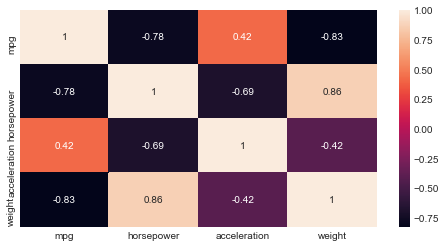

In [47]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)